In [60]:
# # !python3 -m venv .venv
# !cd /home/aditi/MTech/PG2/Semester\ 4/Project/STGan/STGAN
# !source new_env/bin/activate

In [61]:
# # preparation
# !git clone https://github.com/csmliu/STGAN.git
# %cd STGAN

In [1]:
!pwd
# !ls ../CelebAMask-HQ/CelebA-HQ-img

/home/aditi/MTech/PG2/Semester 4/Project/STGan


In [1]:
DIR = 'sample_testing-20220331T023601Z-001/sample_testing'
DIR2 = 'STGAN/DATAROOT/img_align_celeba'
print(len(os.listdir(DIR)))
print(len(os.listdir(DIR2)))

2641
202599


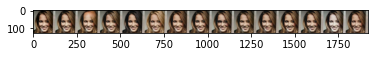

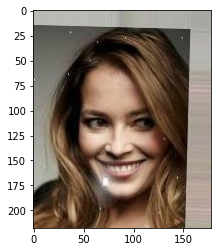

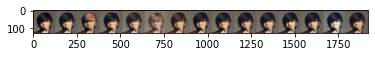

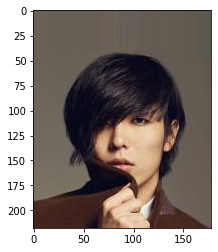

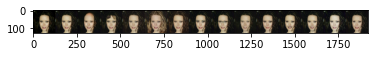

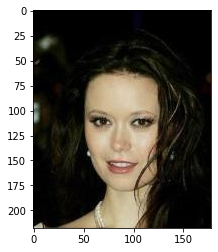

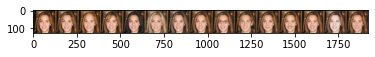

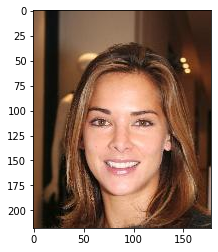

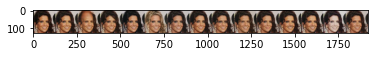

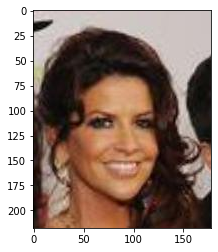

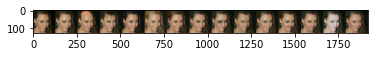

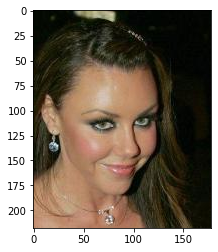

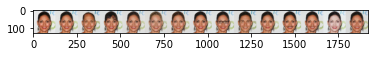

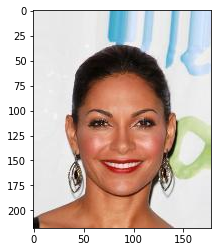

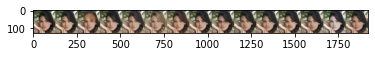

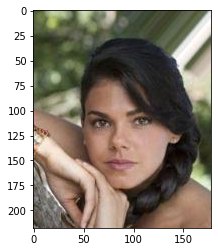

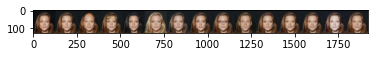

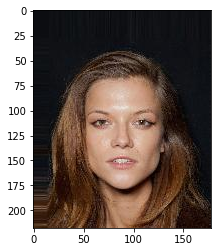

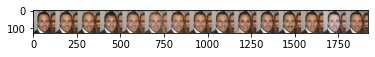

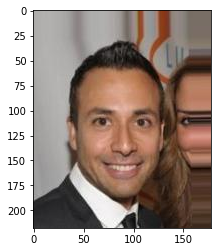

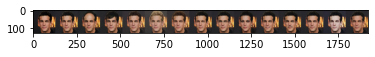

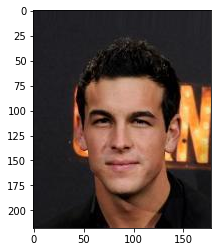

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import os
# assign directory
directory = 'sample_testing-20220331T023601Z-001/sample_testing'
 
# iterate over files in
# that directory
for i, filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        img = cv.imread(f)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.show()
        fn = int(filename.split('.')[0])
        ipimg = 'STGAN/DATAROOT/img_align_celeba/'
        img = cv.imread(ipimg+str(fn)+'.jpg')
        # print(ipimg+str(fn)+'.jpg', f)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.show()
    if(i==10):
        break

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from deepface import DeepFace
from csv import writer

In [3]:
attrListFile = 'STGAN/DATAROOT/list_attr_celeba.txt'
inFile = open(attrListFile, 'r')
attrNames = []
count = 0
attrPresent = [[]]
 
while True:
    count += 1
    line = inFile.readline()
    if not line:
        break
    if(count==1):
        continue
    elif(count==2):
        attrNames = line.split()
    else:
        attrPresent.append(list(map(int, line.split()[1:])))

In [4]:
attrPresent[0] = [0]*len(attrPresent[1])
attrPresent = np.array(attrPresent, dtype = np.int8)

In [5]:
print(attrPresent.shape)
print(attrNames)

(202600, 40)
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [6]:
import json

settingFile = 'STGAN/output/128/setting.txt'

with open(settingFile, 'rb') as setting:
    data = setting.read()
  
d = json.loads(data)

modifiedAttrList = d['atts']
print(modifiedAttrList)

['Bald', 'Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Eyeglasses', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'No_Beard', 'Pale_Skin', 'Young']


In [7]:
def splitImage(imgPath, attrList, fileFormat = "jpg"):
    """

    """
    img = cv.imread(imgPath)
    count = len(attrList)+2
    # print(count)
    h, w = img.shape[0], img.shape[1]
    subImgWidth = int(w/count) 
    for i in range(count):
        # if(i<2):
        #     continue
        saveAs = attrList[i-2] + "." + fileFormat
        # saveAs = str(i) + "." + fileFormat
        startCol = i*subImgWidth
        im = img[:, startCol:startCol+subImgWidth, :]
        # print("-----------------",saveAs, "-----------------")
        # plt.imshow(im)
        # plt.show()
        # im = im.astype(np.float32)
        # print(im.dtype)
        # im = im.astype(np.uint8)
        cv.imwrite(saveAs, im)


In [8]:
matchCount = np.zeros((len(attrNames), len(modifiedAttrList)), dtype = np.int16)
nonMatchCount = np.zeros((len(attrNames), len(modifiedAttrList)), dtype = np.int16)

In [9]:
print(matchCount)
print(nonMatchCount)
print(np.shape(matchCount))
print(np.shape(nonMatchCount))

[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

##### For each attribute of image, modify each of the modifiable attribute and find the match count and non-match count

In [11]:
# assign directory
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
outImgDir = 'sample_testing-20220331T023601Z-001/sample_testing'
inputImgDir = 'STGAN/DATAROOT/img_align_celeba/'
splitImageFormat = 'jpg'

attrCount = np.array([0]*len(attrNames), dtype=np.int16)

# iterate over files in that directory
for i, filename in enumerate(os.listdir(outImgDir)):
    print(i)
    outFilePath = os.path.join(outImgDir, filename)
    # checking if it is a file
    if os.path.isfile(outFilePath):
        fn = int(filename.split('.')[0])
        inFilePath = inputImgDir+str(fn)+'.jpg'
        # print(inFilePath, outFilePath)
        splitImage(outFilePath, modifiedAttrList, splitImageFormat)
        for idx, attrModified in enumerate(modifiedAttrList):
            result = DeepFace.verify(inFilePath, attrModified + '.' + splitImageFormat, model_name = models[6], enforce_detection = False)
            # print(idx, attrModified, result)
            if(result['verified']):     #if match
                matchCount[np.where(attrPresent[fn]==1)[0], idx]+=1
            else:
                nonMatchCount[np.where(attrPresent[fn]==1)[0], idx]+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [12]:
print(matchCount)
print(nonMatchCount)

[[ 264  270  267  265  269  265  270  267  269  270  271  265  270]
 [ 749  753  764  755  765  762  743  762  760  763  764  758  769]
 [1255 1264 1273 1264 1273 1268 1252 1267 1273 1267 1274 1265 1279]
 [ 496  501  504  494  502  503  507  502  507  505  506  499  506]
 [  62   65   66   64   65   64   63   65   66   64   65   63   65]
 [ 402  400  406  404  407  406  391  410  409  405  404  401  408]
 [ 858  870  874  866  873  875  864  875  879  878  877  860  881]
 [ 527  532  534  524  532  536  535  532  538  535  533  522  537]
 [ 749  754  766  753  764  763  770  758  767  765  767  747  769]
 [ 317  316  317  320  318  317  301  322  319  320  320  317  320]
 [ 125  128  124  124  127  126  130  126  128  128  128  120  126]
 [ 468  474  471  472  474  471  470  469  475  471  473  471  473]
 [ 326  325  330  329  331  329  329  329  331  330  330  331  333]
 [ 149  150  151  148  150  151  154  151  154  151  150  146  152]
 [ 127  130  132  129  131  130  131  130  133  

In [13]:
np.savetxt('matchCount.csv', matchCount, delimiter=",")
np.savetxt('nonMatchCount.csv', nonMatchCount, delimiter=",")

In [70]:
# mCount = np.genfromtxt('matchCount.csv',delimiter=',')
# nmCount = np.genfromtxt('nonMatchCount.csv',delimiter=',')

#### If female, change attributes Bald, Male, Mustache, No_beard and compute match count and non-match count

In [58]:
attrNames.index('Male')

20

In [14]:
# assign directory
outImgDir = 'sample_testing-20220331T023601Z-001/sample_testing'
inputImgDir = 'STGAN/DATAROOT/img_align_celeba/'
splitImageFormat = 'jpg'
maleIdx = attrNames.index('Male')

attrCount = np.array([0]*len(attrNames), dtype=np.int16)
femaleCount = 0
matchList = [0]*len(modifiedAttrList)
nonMatchList = [0]*len(modifiedAttrList)

# iterate over files in that directory
for i, filename in enumerate(os.listdir(outImgDir)):

    print(i)

    outFilePath = os.path.join(outImgDir, filename)

    # checking if it is a file
    if os.path.isfile(outFilePath):
        fn = int(filename.split('.')[0])

        #if the input image has a male, skip image
        if(attrPresent[fn][maleIdx]==1):
            continue

        femaleCount+=1
        inFilePath = inputImgDir+str(fn)+'.jpg'

        splitImage(outFilePath, modifiedAttrList, splitImageFormat)
        for idx, attrModified in enumerate(modifiedAttrList):
            # if(attrModified not in ['Bald', 'Male', 'Mustache', 'No_beard']):
            #     continue
            result = DeepFace.verify(inFilePath, attrModified + '.' + splitImageFormat, enforce_detection = False)
            if(result['verified']):     #if match
                matchList[idx]+=1
            else:
                nonMatchList[idx]+=1

print(femaleCount)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
print(matchList)
print(nonMatchList)

[1583, 1603, 1599, 1600, 1603, 1598, 1580, 1572, 1601, 1603, 1603, 1604, 1600]
[30, 10, 14, 13, 10, 15, 33, 41, 12, 10, 10, 9, 13]


In [25]:
matchList.insert(0, 'Female')
nonMatchList.insert(0, 'Female')
print(matchList)
print(nonMatchList)

['Female', 1585, 1600, 1600, 1600, 1605, 1601, 1578, 1570, 1601, 1603, 1604, 1603, 1600]
['Female', 28, 13, 13, 13, 8, 12, 35, 43, 12, 10, 9, 10, 13]


In [26]:
with open('matchCount.csv', 'a') as f:
    writer_object = writer(f)  
    # Pass the list as an argument into the writerow()
    writer_object.writerow(matchList)
    f.close()    

with open('nonMatchCount.csv', 'a') as f:
    writer_object = writer(f)  
    # Pass the list as an argument into the writerow()
    writer_object.writerow(nonMatchList)
    f.close()        

##### Count number of people with different attributes

In [54]:
outImgDir = 'sample_testing-20220331T023601Z-001/sample_testing'

attrCount = []
fileNumbers = []

#get fn of images in output (modified by STGan)
for i, filename in enumerate(os.listdir(outImgDir)):
    outFilePath = os.path.join(outImgDir, filename)

    # checking if it is a file
    if os.path.isfile(outFilePath):
        fn = int(filename.split('.')[0])
        fileNumbers.append(fn)

for i, _ in enumerate(attrNames):
    arr = np.where(attrPresent[fileNumbers,i] == 1)
    attrCount.append(len(arr[0]))

In [56]:
attrCount.insert(0, 'Total Images')
print(attrCount)

['Total Images', 273, 778, 1302, 521, 67, 424, 906, 550, 785, 329, 136, 482, 338, 157, 136, 186, 124, 92, 1082, 1272, 1028, 1329, 110, 387, 2262, 771, 102, 774, 239, 209, 127, 1311, 569, 953, 545, 118, 1359, 364, 195, 1999]


In [17]:
# assign directory
outImgDir = 'sample_testing-20220331T023601Z-001/sample_testing'
inputImgDir = 'STGAN/DATAROOT/img_align_celeba/'
splitImageFormat = 'jpg'
youngIdx = attrNames.index('Young')

attrCount = np.array([0]*len(attrNames), dtype=np.int16)
notYoungCount = 0
matchList = [0]*len(modifiedAttrList)
nonMatchList = [0]*len(modifiedAttrList)

# iterate over files in that directory
for i, filename in enumerate(os.listdir(outImgDir)):

    print(i)

    outFilePath = os.path.join(outImgDir, filename)

    # checking if it is a file
    if os.path.isfile(outFilePath):
        fn = int(filename.split('.')[0])

        #if the input image has a young person, skip image
        if(attrPresent[fn][youngIdx]==1):
            continue

        notYoungCount+=1
        inFilePath = inputImgDir+str(fn)+'.jpg'

        splitImage(outFilePath, modifiedAttrList, splitImageFormat)
        for idx, attrModified in enumerate(modifiedAttrList):
            result = DeepFace.verify(inFilePath, attrModified + '.' + splitImageFormat, enforce_detection = False)
            if(result['verified']):     #if match
                matchList[idx]+=1
            else:
                nonMatchList[idx]+=1

print(notYoungCount)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
print(matchList)
print(nonMatchList)

[638, 638, 638, 640, 639, 640, 639, 629, 639, 638, 639, 638, 639]
[4, 4, 4, 2, 3, 2, 3, 13, 3, 4, 3, 4, 3]


In [63]:
matchList.insert(0, 'Not_Young')
nonMatchList.insert(0, 'Not_Young')
print(matchList)
print(nonMatchList)

['Not_Young', 639, 639, 638, 640, 639, 639, 639, 630, 639, 638, 639, 638, 639]
['Not_Young', 3, 3, 4, 2, 3, 3, 3, 12, 3, 4, 3, 4, 3]


In [64]:
with open('matchCount.csv', 'a') as f:
    writer_object = writer(f)  
    # Pass the list as an argument into the writerow()
    writer_object.writerow(matchList)
    f.close()    

with open('nonMatchCount.csv', 'a') as f:
    writer_object = writer(f)  
    # Pass the list as an argument into the writerow()
    writer_object.writerow(nonMatchList)
    f.close()        

### Count identities

In [31]:
outImgFileNames = []
DIR = 'sample_testing-20220331T023601Z-001/sample_testing'

outImgFileNames = os.listdir(DIR)
# print(outImgFileNames)

identityDict = dict()

fp = open('/home/aditi/MTech/PG2/Semester 4/Project/STGan/STGAN/DATAROOT/identity_CelebA.txt', 'r')

while True:
    line = fp.readline().strip()
    if not line:
        break
    val = line.split(' ')
    identityDict[val[0]] = val[1]

countIdentity = dict()

for i in outImgFileNames:
    i = i.split('.')[0]+'.jpg'
    ident = identityDict[i]
    if ident in countIdentity:
        countIdentity[ident]+=1
    else:
        countIdentity[ident] = 1

identityNames = list(countIdentity.keys())
print(len(identityNames))

853
